# Pymaceuticals Inc.
---
### Analysis

Over the course of 45 days, tumor development was observed and measured to compare the performance of Pymaceuticals' drug, Capomulin, against other treatment regimens. In the study, there were 248 mice tested, 51% male and 49% female. From initial summary statistics, the drug of interest Capomulin and other treatment drug Remicane, present less variability in Tumor Volume measured in mm3. In the number of times the mice were observed, there is a sku in relation to other treatment drugs observed versus Capomulin and Remicane. This lack of consistency of observed tumor volume could impact a depiction of efficiently of drugs. However, Capomulin and Remicane offer similar results in tumor volume mass with dramatic increases with infubinol and Ceftamin in comparison. From a sample of a mouse, l509, treated with Capomulin over 45 days there is a positive slope with a dramatic negative slope. These behaviors could exhibit the growth of the tumor until the drugs affect started to become present. There is a slight uptick at the 35 day mark and more data will be needed to make any conclusions on the effectiveness of the drug. There is a strong postive correlation with average tumor volume and weight of mice given Capomulin--as mouse weight increases, these tends to be a corresponding increase in the average observed tumor volume. Further studies on weight, tumor volume and timepoints need further analysis. However, from information we have taken from mouse l509, we can hypothesis that as the mouse is Capomulin the tumor volume decreases in size, the mouse lost weight due to the affects of the drug.    
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
total_mice = mouse_study["Mouse ID"].nunique()
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_duplicates = mouse_study.duplicated(subset=["Mouse ID","Timepoint"], keep=False)
duplicate_ids = mouse_study[mouse_study_duplicates]["Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_duplicates = mouse_study.duplicated(subset=["Mouse ID","Timepoint"], keep=False)
mouse_study[mouse_study_duplicates]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study[mouse_study["Mouse ID"] != "g989"]
mouse_study_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice = mouse_study_cleaned["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = mouse_study_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary_statistics = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                                        "Median Tumor Volume": tumor_median,
                                        "Tumor Volume Variance": tumor_variance,
                                        "Tumor Volume Std. Dev.": tumor_std,
                                        "Tumor Volume Std. Err.": tumor_sem})
tumor_summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_statistics = mouse_study_cleaned.groupby('Drug Regimen').agg(
    {"Tumor Volume (mm3)":["mean","var","std","sem"]})
tumor_summary_statistics

Tumor Volume (mm3)                               
                           mean        var       std       sem
Drug Regimen                                                  
Capomulin             40.675741  24.947764  4.994774  0.329346
Ceftamin              52.591172  39.290177  6.268188  0.469821
Infubinol             52.884795  43.128684  6.567243  0.492236
Ketapril              55.235638  68.553577  8.279709  0.603860
Naftisol              54.331565  66.173479  8.134708  0.596466
Placebo               54.033581  61.168083  7.821003  0.581331
Propriva              52.320930  43.852013  6.622085  0.544332
Ramicane              40.216745  23.486704  4.846308  0.320955
Stelasyn              54.233149  59.450562  7.710419  0.573111
Zoniferol             53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

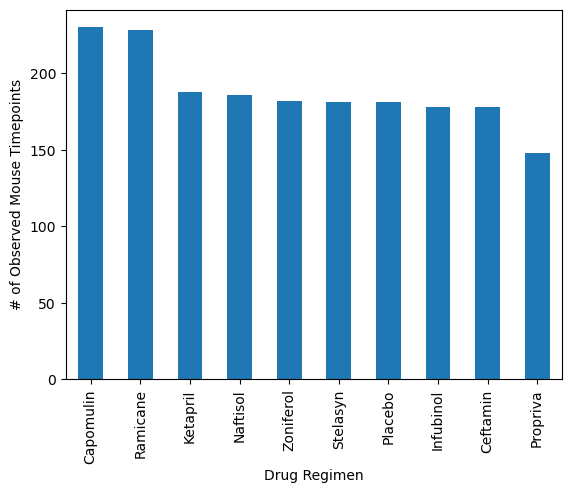

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = mouse_study_cleaned["Drug Regimen"].value_counts()
drug_count.plot(kind='bar')
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<BarContainer object of 10 artists>

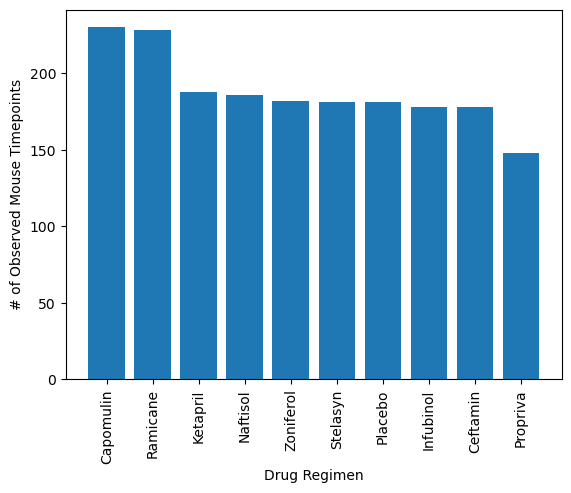

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = mouse_study_cleaned["Drug Regimen"].value_counts()
fig, ax = plt.subplots()
ax.set_xticks(range(len(drug_count)))
ax.set_xticklabels(drug_count.index, rotation=90)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")
ax.bar(range(len(drug_count)), drug_count)


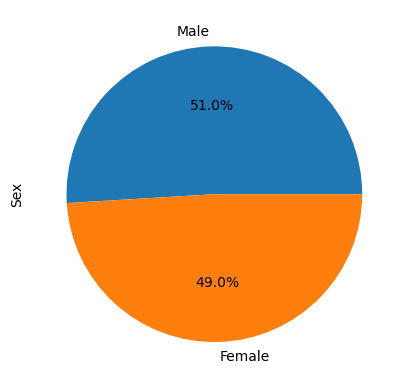

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_study_cleaned["Sex"].value_counts()
gender_count.plot(kind="pie", labels=gender_count.index,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


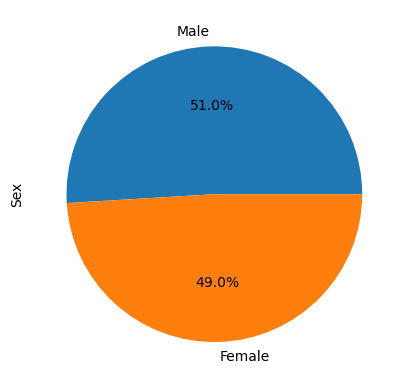

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = mouse_study_cleaned["Sex"].value_counts()
plt.pie(gender_count, labels=gender_count.index,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimen:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_study_cleaned.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(greatest_timepoint, mouse_study_cleaned, on=["Mouse ID", "Timepoint"], how='left')
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)
    
    # add subset 
    subset = final_tumor_volume.iloc[range(26,200)]
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment}'s potential outliers: {treatment_data} {round(lower_bound,2)}  {round(upper_bound,2)} ")


Capomulin's potential outliers: 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64 20.7  51.83 
Ramicane's potential outliers: 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
76     33.562402
77     36.374510
91     31.560470
93     36.134852
96     22.050126
119    30.564625
126    31.095335
157    45.220869
158    36.561652
166    37.225650
168    43.419381
177    30.276232
190    40.667713
217    43.166373
235    44.183451
244    30.638696
Name: Tumor Volume (mm3), dtype: 

Text(0, 0.5, 'Tumor Volume (mm3)')

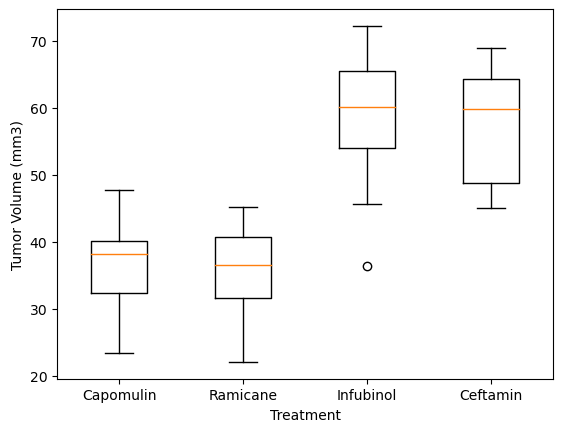

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

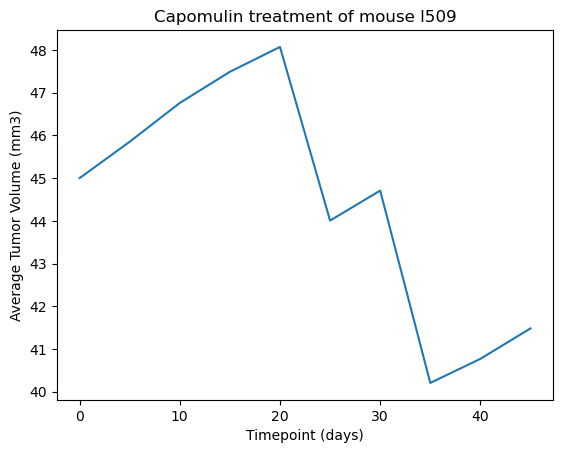

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
campomulin_mice = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]
mouse = campomulin_mice[campomulin_mice["Mouse ID"] == "l509"]
days = mouse["Timepoint"]
tumor_volume = mouse["Tumor Volume (mm3)"]
plt.xlabel("Timepoint (days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.plot(days,tumor_volume)
plt.show()



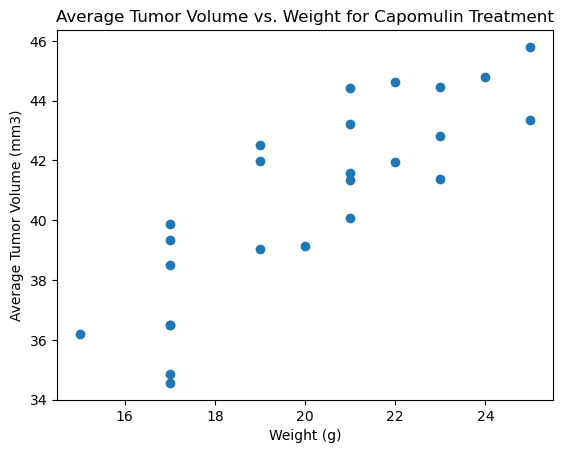

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
campomulin_mice = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume for each mouse
campomulin_tumor_avg = campomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get unique weights corresponding to each mouse ID
weights = campomulin_mice.groupby("Mouse ID")["Weight (g)"].first()

# Scatter plot of average tumor volume vs weight 
plt.scatter(weights, campomulin_tumor_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Capomulin Treatment")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average observed tumor volume is 0.84


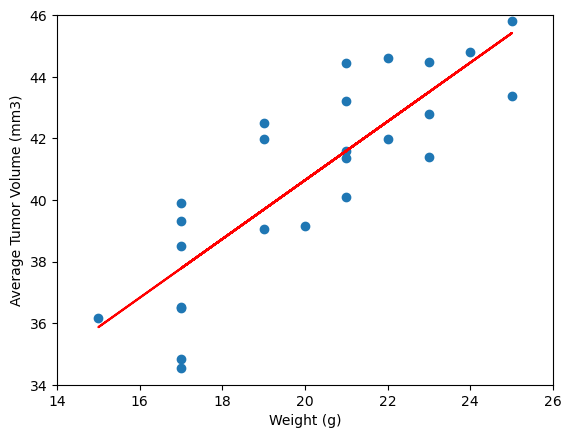

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
campomulin_mice = mouse_study_cleaned[mouse_study_cleaned["Drug Regimen"] == "Capomulin"]

# Calculate average tumor volume for each mouse
campomulin_tumor_avg = campomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get unique weights corresponding to each mouse ID
weights = campomulin_mice.groupby("Mouse ID")["Weight (g)"].first()

print(f"The correlation coefficient between mouse weight and average observed tumor volume is {round(st.pearsonr(campomulin_tumor_avg,weights)[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, campomulin_tumor_avg)
regress_values = weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weights, campomulin_tumor_avg)
plt.plot(weights,regress_values,"r-")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.xlim(14, 26)
plt.ylim(34, 46)

plt.show()
